# **GROUPBY**

A linguagem SQL se tornou popular por facilitar muito a vida de quem tem que unir dados, filtrá-los, transformá-los e agregá-los. No entanto ela é limitada quanto ao tipo de operações em grupo que pode executar. 

Neste ponto o Pandas é um importante aliado que oferece recursos poderosos que aumentam muito a produtividade de quem tem que trabalhar com dados agregados. 

Particularmente sou bastante suspeito para falar do Pandas. Acho a ferramenta sensacional. Com ela consigo de forma muito rápida fazer limpeza de dados, executar operações com funções ridiculamente simples, além de conseguir visualizar os dados de forma gráfica utilizando as funcionalidades nativas que ele nos oferece.

Neste notebook vou te mostrar como fazer agrupamento múltiplo passando como parâmetros para o método groupby duas funções. 

Sim, ele é tão poderoso que você pode passar funções como parâmetro. 


## **OBJETIVO**

Neste notebook eu irei pegar três anos de cotações de empresas que compõem nosso índice bovespa e na sequencia vou verificar como é a correlação destes ativos com o Índice de referencia ao longo dos anos e dos meses.

Como você já deve estar imaginando, o agrupamento será feito por anos e meses. Este mesmo procedimento pode ser facilmente adaptado para qualquer realidade. 

Imagine que você é m gerente de vendas e que visualizar a performance de vendedores por regiões ou quem sabe até por produtos. O Groupby vai te ajudar muito. 

## **DESCRIÇÃO DAS COLUNAS***

* BOVA11.SA - Ticker do ETF BOVA11. Para este estudo ele será nosso indice de referência
* PETR4.SA - Ticker da açõe preferencial da Petrbras
* VALE3.SA - Ticker da empresa de mineração Vale

# **MANIPULAÇÃO DOS DADOS**

## **IMPORTAÇÃO DAS BIBLIOTECAS**

Inicialmente importo as bibliotecas que serão necessárias para fazer o estudo.

 - *Pandas* – Biblioteca que será utilizada para armazenar e tratar os dados como o Groupby
 - *Yfinance* – Biblioteca do Yahoo Finance que será utilizada como fonte de consulta dos dados históricos das ações.
 - *DateTime* – Biblioteca destinada a manipulação de datas.
 - *Matplotlib* – Biblioteca destinada a plotagem e configuração de gráficos. 
 - *Seaborn* – Biblioteca que será utilizada para gerar o heatmap da correlação entre os ativos. 



In [1]:
import pandas as pd
import yfinance as y
import datetime
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

## **IMPORTAÇÃO DOS DADOS**

Agora vou definir o período de consulta. Para este exemplo, vou pegar dados do inicio do ano de 2019 até o final do ano de 2021. 

Este range é definido através das variáveis start e end que logo serão passadas como parâmetro para o método Download do Yahoo Finance. 
  
Na sequencia, também defino os ativos que terão seu histórico de cotação carregado. Aqui, opto por  armazená-los em uma lista. 
OBS: Uma particularidade do Yahoo Finance é que tenho que acrescentar o .SA ao final dos tickers originais. 

Note que pego somente os dados de fechamento dos ativos. Por padrão o Yahoo retorna, Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. 


In [2]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,12,31)

In [3]:
ativos  = ['bova11.sa', 'petr4.sa', 'vale3.sa']

In [4]:
carteira = y.download(ativos, start = start, end = end)['Close']

[*********************100%***********************]  3 of 3 completed


## **VERIFICAÇÃO DOS DADOS E MANIPULAÇÃO**

Agora que já tenho os dados carregados na minha máquina, verifico a integridades dos mesmos. A ideia aqui é verificar se não tenho dados faltantes ou nulos. 

Gosto de verificar os dados com o método .info(). Com ele consigo verificar facilmente se todos os ativos tem o mesmo numero de registros, assim como o tipo de dados.

Como irei executar cálculos tenho que ter todos os dados no formato numérico. 

Veja que temos 743 registros  para cada um dos ativos e que o tipo de dados é float.

Na sequencia, faço o calculo da variação percentual de cada um dos ativos. E aqui já tenho uma das facilidades do Pandas. Simplesmente apliquei o método Percent Change no Data Frame e todo o seu conteúdo foi calculado. 

Quem vem de outras linguagens geralmente utiliza um for para executar este tipo de operação. 

Aproveito também para tirar os dados NaN que ficaram na primeira coluna por conta do pct_change(). Esta limpeza também é extremamente  simples. Bastou aplicar o método dropna()


In [5]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 743 entries, 2019-01-02 to 2021-12-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BOVA11.SA  743 non-null    float64
 1   PETR4.SA   743 non-null    float64
 2   VALE3.SA   743 non-null    float64
dtypes: float64(3)
memory usage: 23.2 KB


In [6]:
carteira = carteira.pct_change() * 100 

In [7]:
carteira = carteira.dropna()

In [8]:
carteira

,BOVA11.SA,PETR4.SA,VALE3.SA
Date,,,
2019-01-03,0.113764,2.452204,-4.090820
2019-01-04,0.568182,0.283974,6.510201
2019-01-07,-0.022595,1.577675,-0.536499
2019-01-08,0.395568,-0.597378,0.963206
2019-01-09,1.677359,2.083335,2.442280
...,...,...,...
2021-12-23,-0.571825,0.603693,-0.963459
2021-12-27,0.743679,1.482528,-0.252691
2021-12-28,-0.531497,0.104350,-2.406579


## **AGRUPAMENTO E VISUALIZAÇÃO DE DADOS**

Como mencionado no início deste notebook, a ideia central aqui é trabalhar com o agrupamento de dados. 

E o agrupamento será feito por duas funções. A função ano e a função mês. A primeira retorna o ano do campo Data e a segunda retorna o mês. 

Na sequencia, crio outra função (corr) que serve justamente para fazer a correlação dos ativos com o BOVA11. 

Para armazenar os dados agrupados crio uma variável que chamo de por_ano. Veja que aqui é onde a coisa realmente começa a acontecer. Passo tanto a função ano quanto a mês para o groupby.

Por ultimo, crio outra variável que armazena o resultado da função corr. 

Após isso, apenas gerei um gráfico. Mas preste atenção, durante a plotagem do gráfico utilizei o unstack do pandas para fazer um reagrupamento do Data Frame utilizando o nivel zero como referencia. 

Este método me retorna um Data Frame com um novo nível de rótulos. 

Agora consigo ver os ativos organizados por Ano e por Meses. Com isso consigo veriricar como se dá a correlação mês a mês ao longo do anos. 

In [9]:
ano = lambda x: x.year #Retorna o Ano do campo Data
mes = lambda x: x.month #Retorna o Mes do campo Data
corr = lambda x: x.corrwith(x['BOVA11.SA']) #Faz o correlação dos Ativos com o BOVA11

In [10]:
por_ano = carteira.groupby([ano, mes])

In [11]:
correlacao = por_ano.apply(corr)

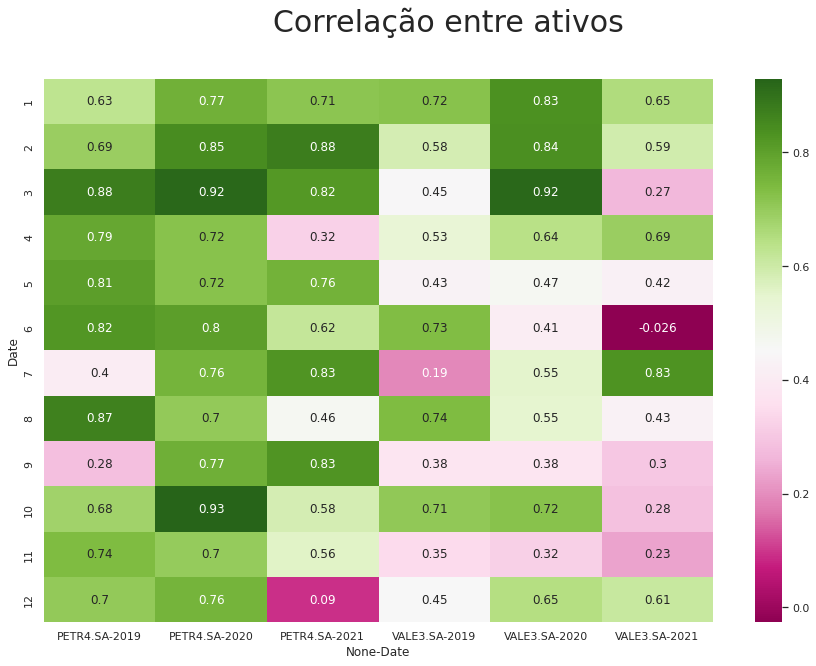

In [12]:
fig, axes = plt.subplots(1, figsize = (15,10))
fig.suptitle('Correlação entre ativos', fontsize = 30)


sns.heatmap(correlacao.iloc[ : ,1 :].unstack(level = 0), annot = True, cmap = 'PiYG');

# **CONCLUSÃO**
O nível de produtividade que o Pandas oferece para quem trabalha com análise de dados é simplesmente sensacional, principalmente para quem trabalha com agrupamento de dados. 

Confesso que nas primeiras experiências que tive com ele me pegava fazendo muitos filtros de forma desnecessária e quebrando a cabeça para montar algo que com o GroupBy seria ridiculamente simples e eficiente. 

Atualmente não consigo me imaginar sem este método para visualizar e tratar meus dados. 